In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from scipy.spatial.distance import pdist, squareform
from collections import Counter
import pandas as pd
import scipy

In [31]:
mat_data = scipy.io.loadmat('data_clusters.mat')
# Assuming mat_data is the dictionary loaded from the .mat file
# Extract the array 'X'
#print(mat_data)
X_data = mat_data['X']

# Convert the NumPy array to a pandas DataFrame
df = pd.DataFrame(X_data, columns=['feature_1', 'feature_2']) # You can name the columns appropriately

# Display the first few rows of the DataFrame
display(df.head())

,feature_1,feature_2
0,351,162
1,181,100
2,483,345
3,302,167
4,422,108


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   feature_1  136 non-null    uint16
 1   feature_2  136 non-null    uint16
dtypes: uint16(2)
memory usage: 676.0 bytes


In [35]:
df.describe()

,feature_1,feature_2
count,136.000000,136.000000
mean,281.014706,190.919118
std,144.043820,103.134867
min,14.000000,13.000000
25%,145.000000,122.500000
50%,306.500000,158.500000
75%,399.250000,281.500000
max,514.000000,370.000000


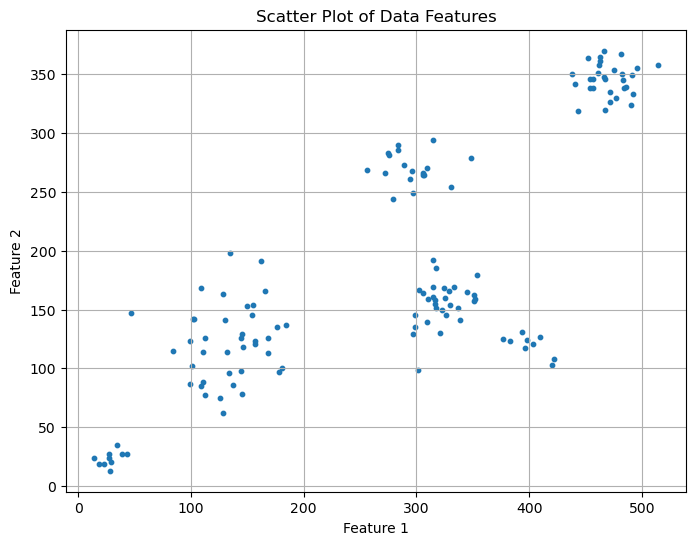

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(df['feature_1'], df['feature_2'], s=10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Data Features')
plt.grid(True)
plt.show()

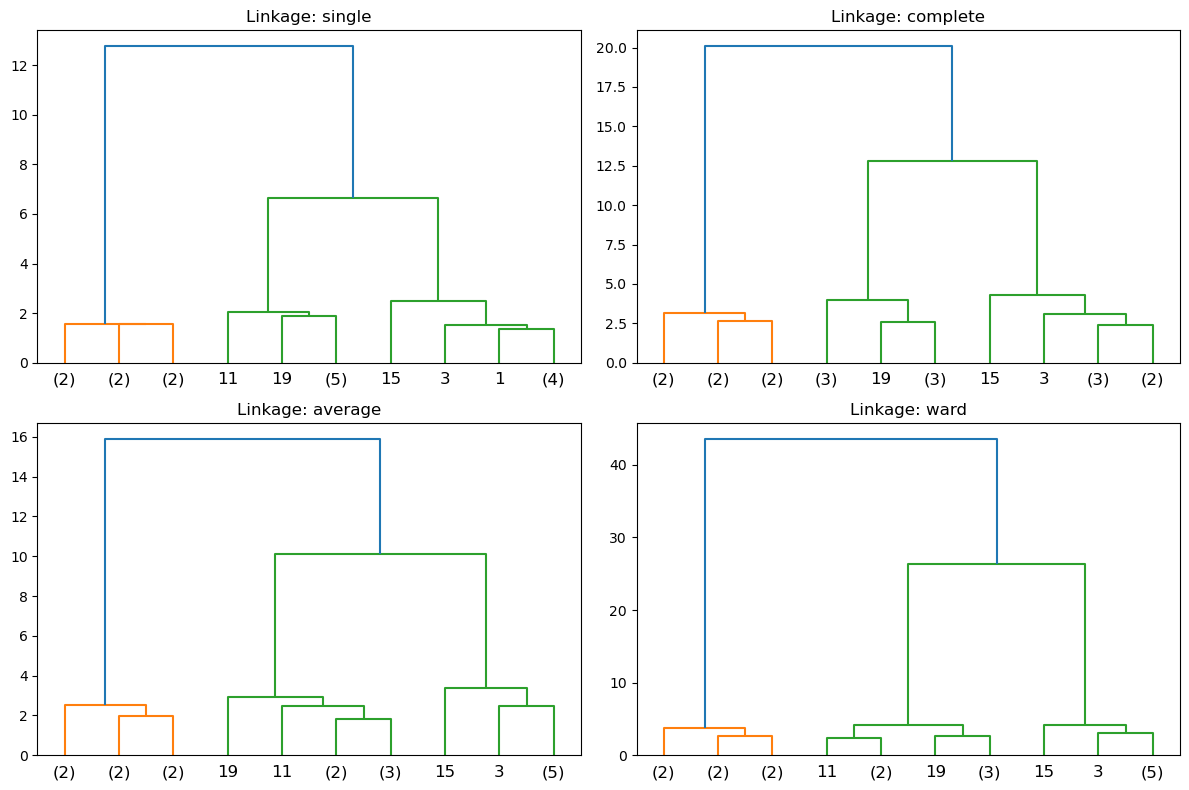

In [5]:

# Dataset simulado
X, y = make_blobs(n_samples=20, centers=3, random_state=42, cluster_std=1.2)

# Diferentes criterios de enlace
methods = ["single", "complete", "average", "ward"]

plt.figure(figsize=(12,8))
for i, method in enumerate(methods, 1):
    Z = linkage(X, method=method)
    plt.subplot(2,2,i)
    dendrogram(Z, truncate_mode="lastp", p=10)
    plt.title(f"Linkage: {method}")
plt.tight_layout()
plt.show()


In [9]:

# Dataset compacto (blobs)
Xb, _ = make_blobs(n_samples=20, centers=3, cluster_std=1.0, random_state=7)

# Dataset alargado/no convexo (lunas)
Xm, _ = make_moons(n_samples=20, noise=0.06, random_state=7)

# Distancias por pares (euclídea)
Db = squareform(pdist(Xb, metric="euclidean"))
Dm = squareform(pdist(Xm, metric="euclidean"))

# Mira algunos valores
Db[:6,:6], Dm[:6,:6]

(array([[ 0.        , 18.99206437, 18.92741597,  2.56596996, 11.4647957 ,
          2.63403796],
        [18.99206437,  0.        ,  1.95900619, 16.57890445,  7.57115647,
         16.4012498 ],
        [18.92741597,  1.95900619,  0.        , 16.43270161,  7.49623415,
         16.40528552],
        [ 2.56596996, 16.57890445, 16.43270161,  0.        ,  9.01600706,
          1.26691278],
        [11.4647957 ,  7.57115647,  7.49623415,  9.01600706,  0.        ,
          8.91549232],
        [ 2.63403796, 16.4012498 , 16.40528552,  1.26691278,  8.91549232,
          0.        ]]),
 array([[0.        , 1.0009252 , 0.32630758, 1.24223936, 0.90977314,
         0.2936275 ],
        [1.0009252 , 0.        , 1.29487802, 2.2428114 , 1.76274671,
         0.79394311],
        [0.32630758, 1.29487802, 0.        , 0.96457874, 0.88330389,
         0.61788682],
        [1.24223936, 2.2428114 , 0.96457874, 0.        , 0.91845115,
         1.48775813],
        [0.90977314, 1.76274671, 0.88330389, 0.91845

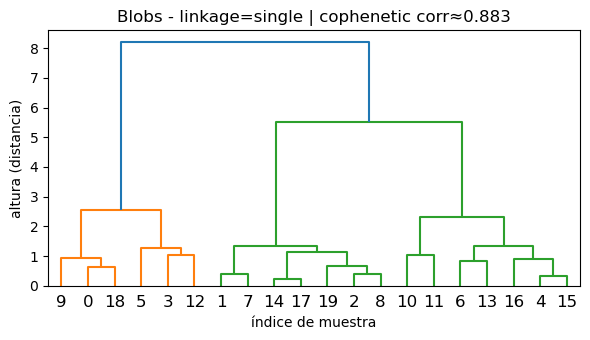

single primeras filas de Z:
 [[14.         17.          0.23847866  2.        ]
 [ 4.         15.          0.32871572  2.        ]
 [ 1.          7.          0.38650687  2.        ]
 [ 2.          8.          0.38837663  2.        ]
 [ 0.         18.          0.63443495  2.        ]]


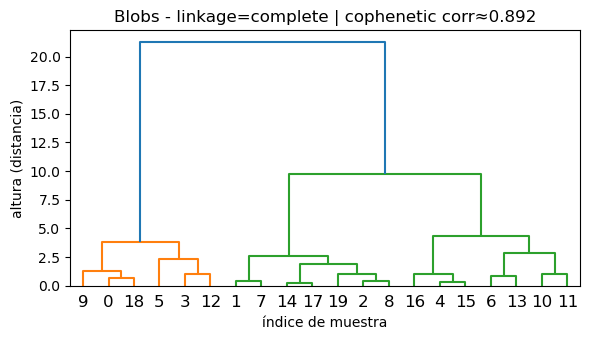

complete primeras filas de Z:
 [[14.         17.          0.23847866  2.        ]
 [ 4.         15.          0.32871572  2.        ]
 [ 1.          7.          0.38650687  2.        ]
 [ 2.          8.          0.38837663  2.        ]
 [ 0.         18.          0.63443495  2.        ]]


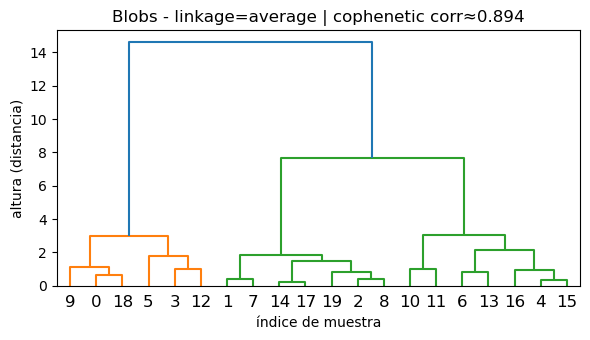

average primeras filas de Z:
 [[14.         17.          0.23847866  2.        ]
 [ 4.         15.          0.32871572  2.        ]
 [ 1.          7.          0.38650687  2.        ]
 [ 2.          8.          0.38837663  2.        ]
 [ 0.         18.          0.63443495  2.        ]]


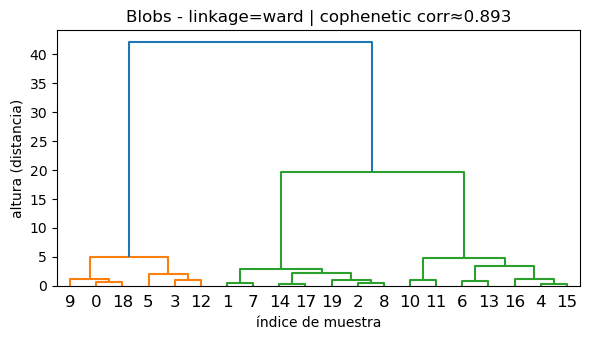

ward primeras filas de Z:
 [[14.         17.          0.23847866  2.        ]
 [ 4.         15.          0.32871572  2.        ]
 [ 1.          7.          0.38650687  2.        ]
 [ 2.          8.          0.38837663  2.        ]
 [ 0.         18.          0.63443495  2.        ]]


In [15]:

# Blobs con varios linkages
for method in ["single", "complete", "average", "ward"]:
    Z = linkage(Xb, method=method, metric="euclidean")
    coph_corr, coph_dists = cophenet(Z, pdist(Xb))  # <- firma estable  # qué tan fiel es el árbol a las distancias originales

    plt.figure(figsize=(6,3.5))
    dendrogram(Z, labels=np.arange(len(Xb)))
    plt.title(f"Blobs - linkage={method} | cophenetic corr≈{coph_corr:.3f}")
    plt.xlabel("índice de muestra"); plt.ylabel("altura (distancia)")
    plt.tight_layout()
    plt.show()

    # Leer primeras fusiones
    print(method, "primeras filas de Z:\n", Z[:5])

In [16]:
Z = linkage(Xb, method="ward")
# Opción A: forzar K clústeres
labels_k3 = fcluster(Z, t=3, criterion="maxclust")

# Opción B: cortar por altura
labels_h = fcluster(Z, t=7.5, criterion="distance")

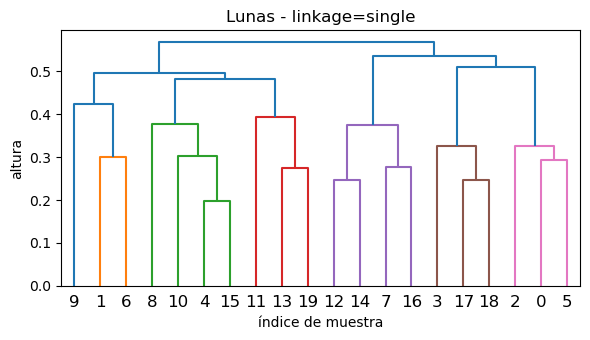

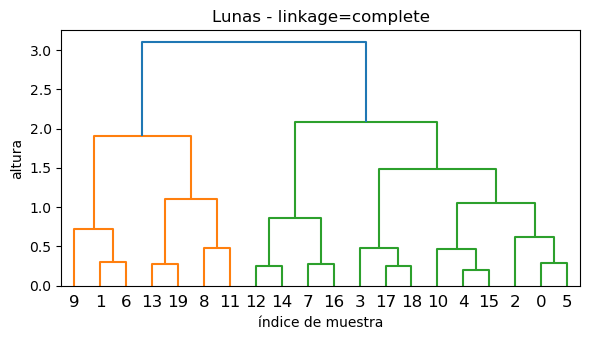

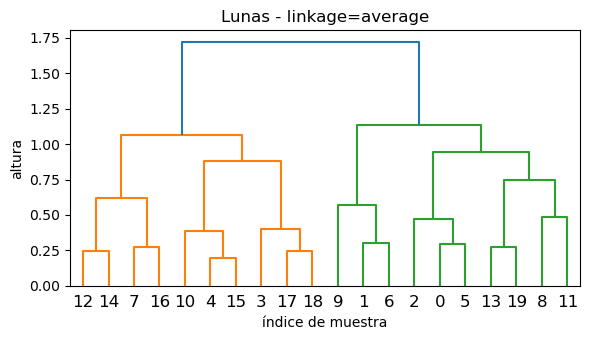

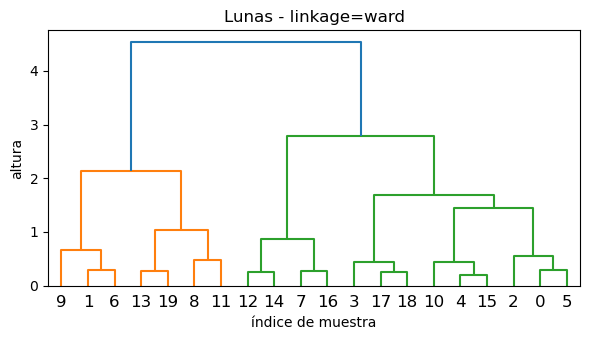

In [17]:
for method in ["single", "complete", "average", "ward"]:
    Zm = linkage(Xm, method=method, metric="euclidean")
    plt.figure(figsize=(6,3.5))
    dendrogram(Zm, labels=np.arange(len(Xm)))
    plt.title(f"Lunas - linkage={method}")
    plt.xlabel("índice de muestra"); plt.ylabel("altura")
    plt.tight_layout()
    plt.show()

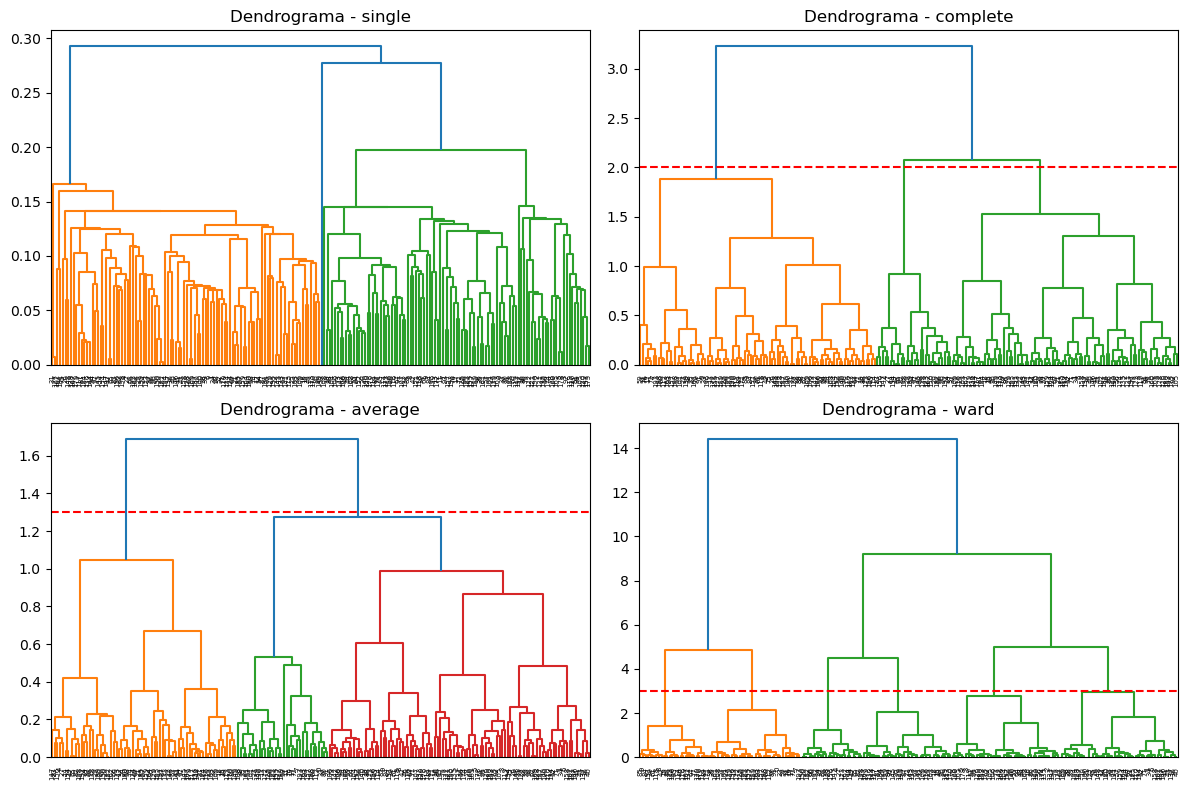

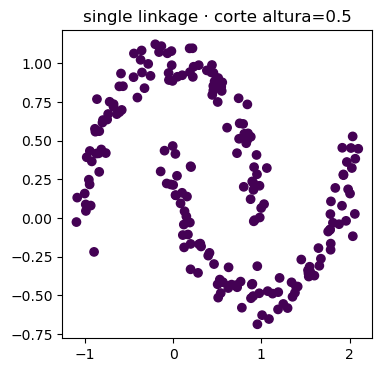

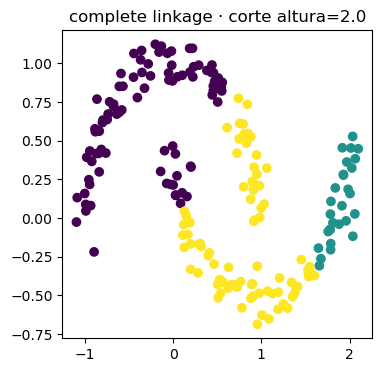

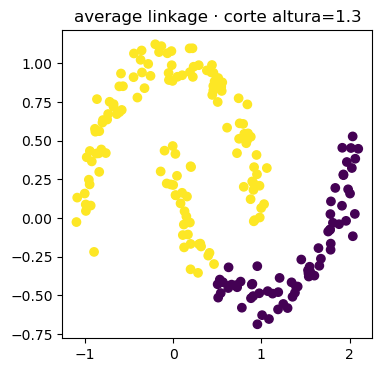

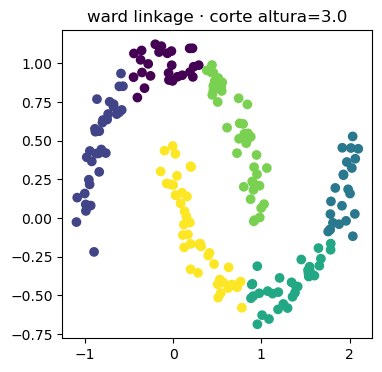

In [20]:
# Dataset lunas
X, _ = make_moons(n_samples=200, noise=0.08, random_state=7)

methods = ["single", "complete", "average", "ward"]
cut_heights = {"single":0.5, "complete":2.0, "average":1.3, "ward":3.0}  # cortes aproximados

# Dendrogramas
plt.figure(figsize=(12,8))
for i, m in enumerate(methods,1):
    Z = linkage(X, method=m)
    plt.subplot(2,2,i)
    dendrogram(Z)
    plt.axhline(cut_heights[m], color="r", ls="--")
    plt.title(f"Dendrograma - {m}")
plt.tight_layout(); plt.show()

# Dispersión coloreada
for m in methods:
    Z = linkage(X, method=m)
    labels = fcluster(Z, t=cut_heights[m], criterion="distance")
    plt.figure(figsize=(4,4))
    plt.scatter(X[:,0], X[:,1], c=labels)
    plt.title(f"{m} linkage · corte altura={cut_heights[m]}")
    plt.show()

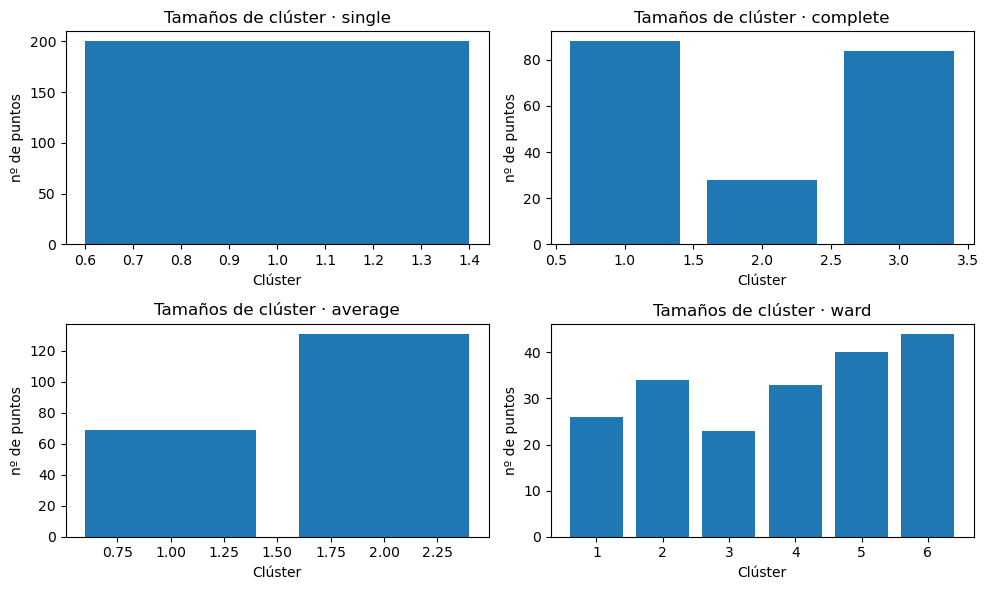

In [23]:
# Dataset lunas
X, _ = make_moons(n_samples=200, noise=0.08, random_state=7)

methods = ["single", "complete", "average", "ward"]
cut_heights = {"single":0.5, "complete":2.0, "average":1.3, "ward":3.0}

plt.figure(figsize=(10,6))
for i, m in enumerate(methods,1):
    Z = linkage(X, method=m)
    labels = fcluster(Z, t=cut_heights[m], criterion="distance")
    counts = Counter(labels)
    
    plt.subplot(2,2,i)
    plt.bar(counts.keys(), counts.values())
    plt.title(f"Tamaños de clúster · {m}")
    plt.xlabel("Clúster"); plt.ylabel("nº de puntos")
plt.tight_layout(); plt.show()

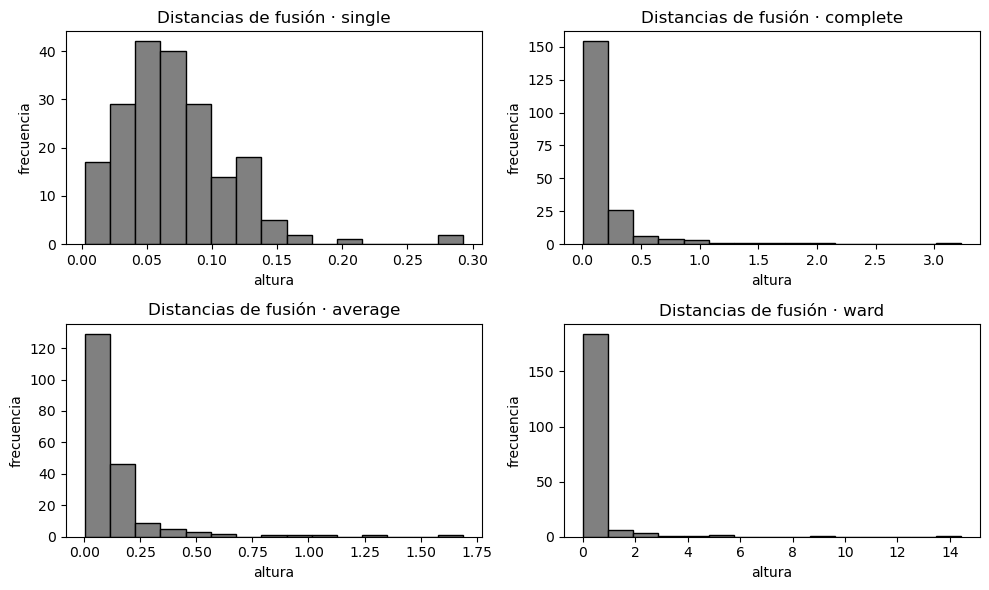

In [24]:
plt.figure(figsize=(10,6))
for i, m in enumerate(methods,1):
    Z = linkage(X, method=m)
    heights = Z[:,2]
    
    plt.subplot(2,2,i)
    plt.hist(heights, bins=15, color="gray", edgecolor="black")
    plt.title(f"Distancias de fusión · {m}")
    plt.xlabel("altura"); plt.ylabel("frecuencia")
plt.tight_layout(); plt.show()